# Signal Processing
## Week \#4 Lab

### Introduction

In this lab, we focus on transform domain analysis of LTI systems. We investigate frequency response (magnitude and phase) and the locations of the poles and zeros. This notebook uses functions from the NumPy and SciPy packages to assist with our analysis and we create a user-defined function to plot the poles/zeros of an LTI system by first using the coefficients from the difference equation or system function to determine the poles and zeros of the system. We start by investigating a simple moving average finite duration impulse response (FIR) system and will also consider two different infinite duration impulse response (IIR) systems.

### Install Python Packages

Import the necessary Python modules to implement the lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### Frequency Response

#### Moving Average Filter

The $M$-point moving average filter is used to smooth signals:

$$
y[n] = \frac{1}{M+1} \sum\limits_{k=0}^{M} x[n-k]
$$

Note how this system has a finite duration impulse response (FIR):

$$
h[n] = \frac{1}{M+1} \qquad 0\leq n \leq M
$$

The system function is found by taking the $z$-transform of the impulse response:

$$
H(z) = \sum\limits_{k=0}^{M} \frac{1}{M+1} z^{-k} = \frac{1}{M+1} \left( \frac{1-z^{-(M+1)}}{1-z^{-1}} \right) = \frac{1}{M+1} \left( \frac{z^{(M+1)}-1}{z^{M}(z-1)} \right)
$$

The zeros are found from $z^{(M+1)}-1=0$ which has M+1 roots (these are roots of unity: $z^{(M+1)}=1$):

$$
z=e^{j2\pi k/(M+1)} \qquad k=0,1,2,3,...,M
$$

Therefore this system has $M+1$ zeros given above, one pole at $z=1$, and $M$ poles at $z=0$. The $z=1$ pole is canceled by the zero at $z=1$.

The Fourier transform of the impulse response provides the frequency response of the moving average filter and is the system function evaluated on the unit circle ($z=e^{j\omega}$):

$$
H(e^{j\omega}) = \frac{1}{M+1} \frac{\sin(\omega(M+1)/2)}{\sin(\omega/2)}e^{-j\omega M/2}
$$

We compute and visualize the frequency response with the magnitude response and the phase response of the system as seen below.

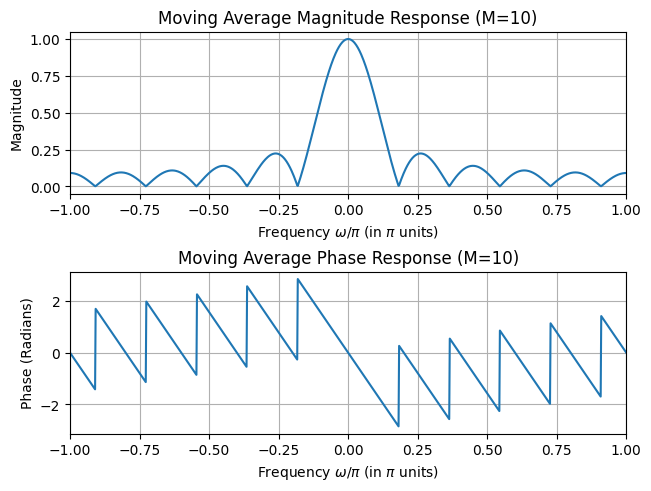

In [2]:
# Determine the frequency response of the moving average filter (M=10)
M = 10 # define filter order
omega = np.linspace(-np.pi, np.pi, 1000) # create normalized frequency vector
H = (1/(M+1)) * np.sin(omega*(M+1)/2) * np.exp(-1j*omega*M/2) / np.sin(omega/2)

# Plot the frequency response of the moving average filter
fig, (ax0, ax1) = plt.subplots(2,1,layout="constrained")
ax0.plot(omega/np.pi, np.abs(H))
ax0.set_title("Moving Average Magnitude Response (M=10)")
ax0.set_xlabel("Frequency $\omega / \pi$ (in $\pi$ units)")
ax0.set_ylabel("Magnitude")
ax0.margins(x=0)
ax0.grid()
ax1.plot(omega/np.pi, np.angle(H))
ax1.set_title("Moving Average Phase Response (M=10)")
ax1.set_xlabel("Frequency $\omega / \pi$ (in $\pi$ units)")
ax1.set_ylabel("Phase (Radians)")
ax1.margins(x=0)
ax1.grid()

Notice how the moving average behaves as a low pass filter with higher frequencies attenuated as seen in the magnitude response. The symmetry of the impulse response leads to (piecewise) linear phase response (there are jumps of $\pi$ in the phase at the zero locations). The horizontal axis in each of these plots is the discrete-time frequency from $-\pi$ to $\pi$. This is also known as the normalized frequency since when working with sampled analog signals, the scaling between discrete-time frequency and continuous-time frequency is:

$$
\omega = \Omega T\\
f = \frac{F}{F_s}
$$

where $\omega$ (radians/sample) and $f$ (cycles/sample) are discrete-time signal frequencies, $\Omega$ (radians/sec) and $F$ (cycles/sec) are continuous-time signal frequencies. The sample interval is $T$ and the sample frequency is $F_s$, reciprocal of the sample interval. The normalized frequency $\omega = \pi$ corresponds to half the sample rate. When we study filter design later in this course, we will learn how to design lowpass filters with a sharper transition band and lower side lobes (better attenuation in the stopband).

#### Computing Frequency Response

Instead of analytically determining the frequency response of a discrete-time system, we can compute the frequency response with __[`scipy.signal.freqz`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html)__ which requires the $b$ and $a$ coefficients from the difference equation or equivalently from the numerator and denominator, respectively, of the rational system function. This is demonstrated below with the same moving average filter. Since this is a FIR filter, all of the a coefficients are zero with the exception of $a_0=1$. Notice how this function computes the frequency response over frequencies $0 \leq \omega \leq \pi$ (when the sampling frequency is not passed to function).

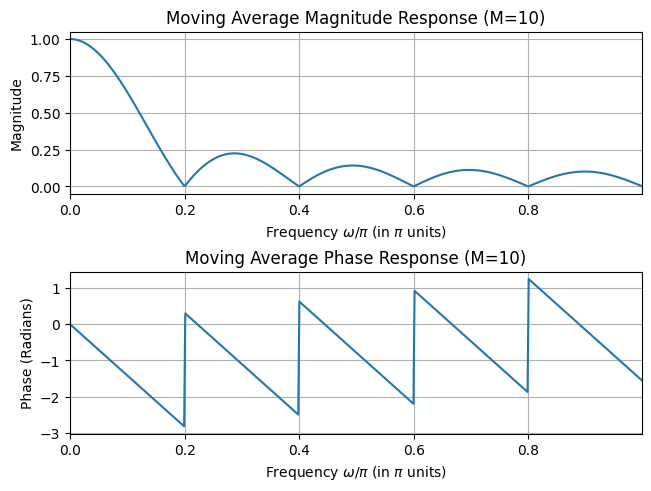

In [3]:
# Use scipy.signal.freqz to compute the frequency response of the moving average filter

M = 10 # define filter order
b = (1/M) * np.ones(M)
omega, H = signal.freqz(b)
fig, (ax0, ax1) = plt.subplots(2,1,layout="constrained")
ax0.plot(omega/np.pi, np.abs(H))
ax0.set_title("Moving Average Magnitude Response (M=10)")
ax0.set_xlabel("Frequency $\omega / \pi$ (in $\pi$ units)")
ax0.set_ylabel("Magnitude")
ax0.margins(x=0)
ax0.grid()
ax1.plot(omega/np.pi, np.angle(H))
ax1.set_title("Moving Average Phase Response (M=10)")
ax1.set_xlabel("Frequency $\omega / \pi$ (in $\pi$ units)")
ax1.set_ylabel("Phase (Radians)")
ax1.margins(x=0)
ax1.grid()

### Pole-Zero Plots

The poles and zeros of a discrete-time system can be computed from the $b$ and $a$ coefficients using __[`scipy.signal.tf2zpk`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.tf2zpk.html)__. Below is a user-defined function to plot the poles and zeros of a linear discrete-time system. The zeros from the moving average filter above are plotted. Observe how this filter has equally spaced zeros on the unit circle with the exception of the zero at $z=1$ that was canceled by a pole at the same location:

$$
z=e^{j2\pi k/(M+1)} \qquad k=1,2,3,...,M
$$

(array([ 0.80901699+0.58778525j,  0.80901699-0.58778525j,
         0.30901699+0.95105652j,  0.30901699-0.95105652j,
        -1.        +0.j        , -0.80901699+0.58778525j,
        -0.80901699-0.58778525j, -0.30901699+0.95105652j,
        -0.30901699-0.95105652j]),
 array([], dtype=float64),
 0.1)

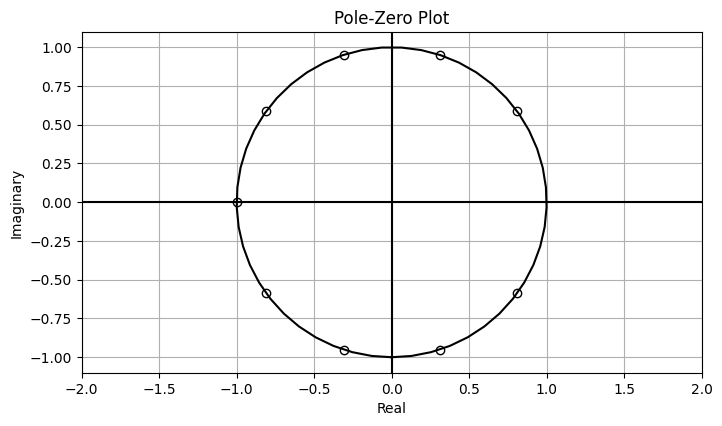

In [4]:
# user defined function for pole-zero plot given the a and b coefficients
def PoleZeroPlot(b, a):
    (zeros, poles, gain) = signal.tf2zpk(b, a)
    angle = np.linspace(-np.pi, np.pi, 50)
    cirx = np.sin(angle)
    ciry = np.cos(angle)
    fig, ax = plt.subplots(figsize = (8,8))
    ax.plot(poles.real, poles.imag, 'kx', zeros.real, zeros.imag, 'ko',markerfacecolor='none')
    ax.plot(cirx, ciry, 'k-')
    ax.axhline(color='black')
    ax.axvline(color='black')
    ax.set_aspect('equal')
    ax.set_xlim((-2,2))
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.grid()
    ax.set_title("Pole-Zero Plot")
    return (zeros, poles, gain)

PoleZeroPlot(b,1)

## Exercise #1

Consider the moving average filter. Plot the magnitude response, phase response, and pole-zero plot for two different moving average filters with orders higher than the $M=10$ from the example above. Show and explain your results and discuss how they are different and/or similar to the example above.

### Approach and Code
1. **Magnitude and Phase Response**:
   - Use the analytical formula given in the notebook for both $ M = 20 $ and $ M = 50 $ to compute the frequency response over a range of frequencies.

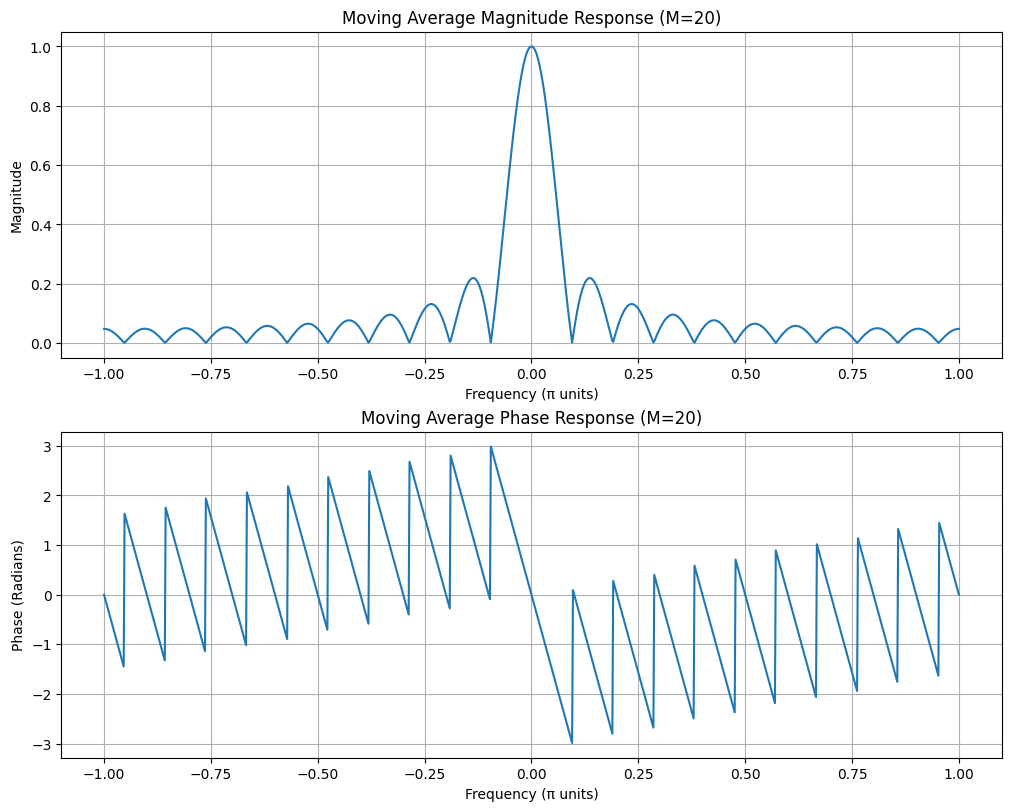

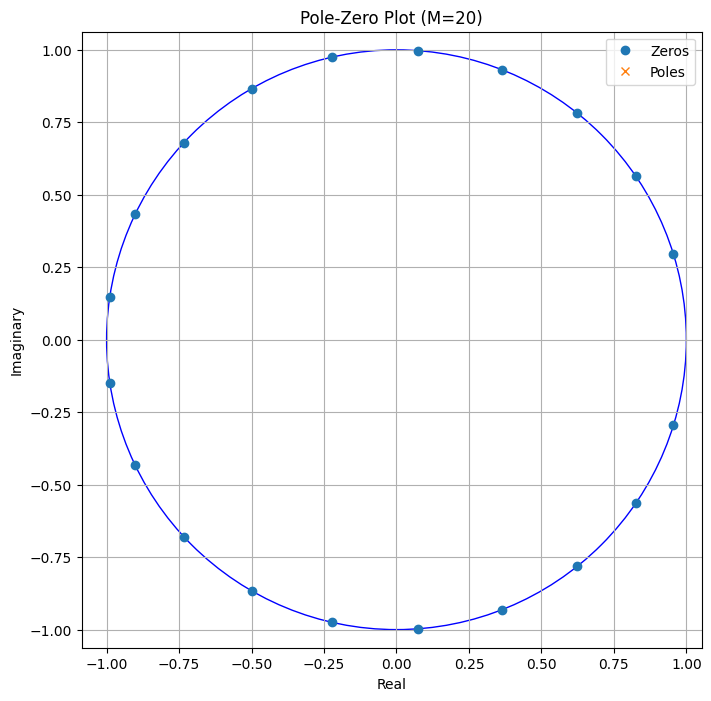

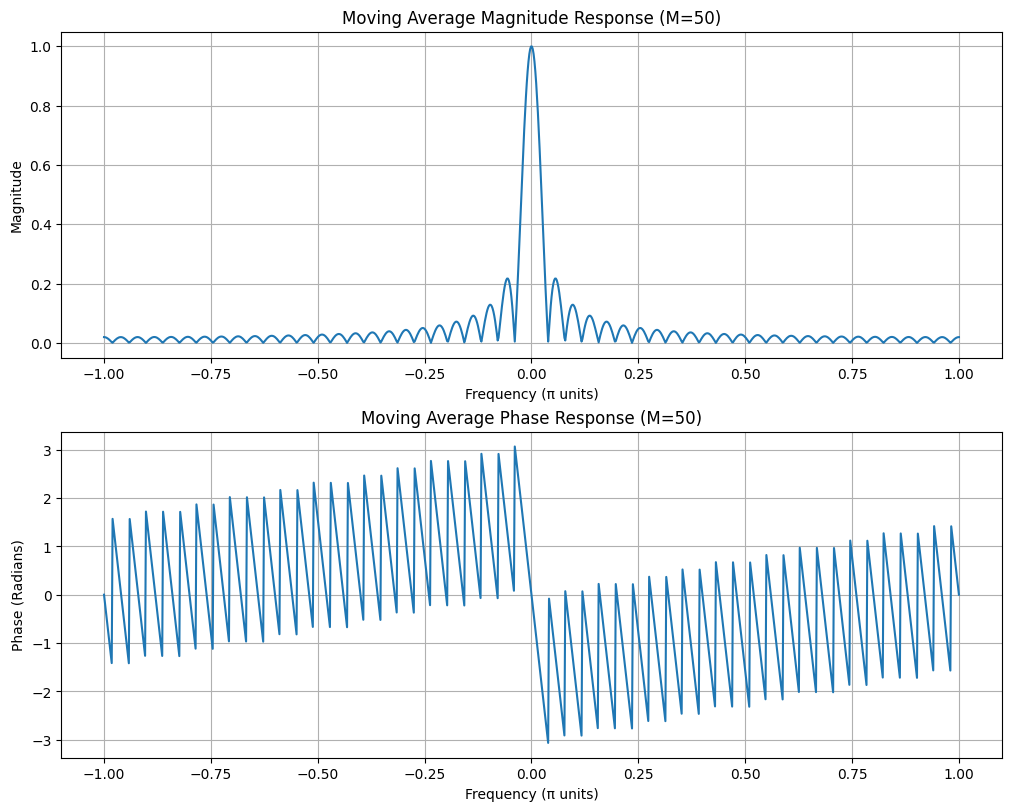

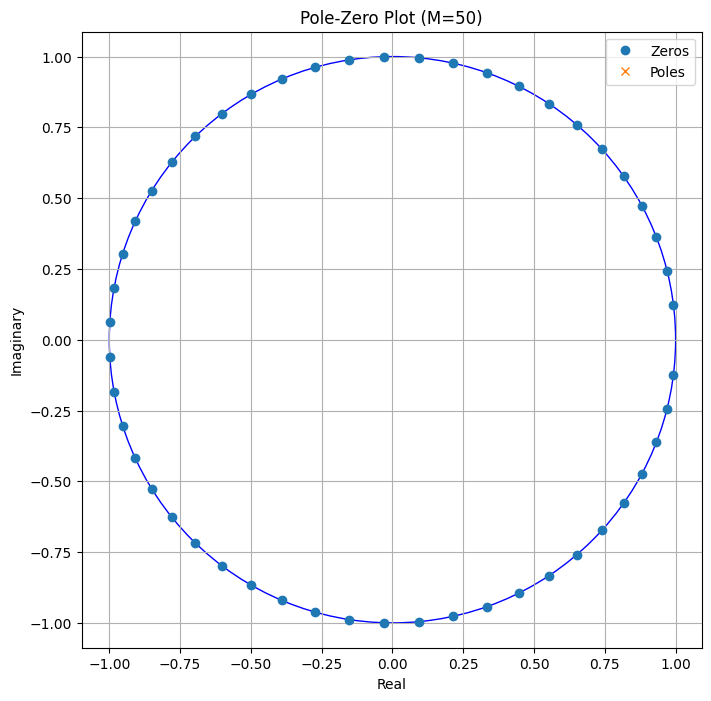

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def plot_moving_average_responses(M):
    # Compute frequency response analytically
    omega = np.linspace(-np.pi, np.pi, 1000)
    H = (1/(M+1)) * np.sin(omega*(M+1)/2) * np.exp(-1j*omega*M/2) / np.sin(omega/2)

    # Plot the magnitude and phase response
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)
    ax0.plot(omega/np.pi, np.abs(H))
    ax0.set_title(f"Moving Average Magnitude Response (M={M})")
    ax0.set_xlabel("Frequency (π units)")
    ax0.set_ylabel("Magnitude")
    ax0.grid(True)

    ax1.plot(omega/np.pi, np.angle(H))
    ax1.set_title(f"Moving Average Phase Response (M={M})")
    ax1.set_xlabel("Frequency (π units)")
    ax1.set_ylabel("Phase (Radians)")
    ax1.grid(True)

    plt.show()

    # Compute zeros and poles using filter coefficients
    b = np.ones(M+1) / (M+1)
    a = np.array([1])
    zeros, poles, _ = signal.tf2zpk(b, a)

    # Pole-Zero plot
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(np.real(zeros), np.imag(zeros), 'o', label='Zeros')
    ax.plot(np.real(poles), np.imag(poles), 'x', label='Poles')
    circle = plt.Circle((0, 0), 1, color='b', fill=False)
    ax.add_artist(circle)
    ax.set_title(f"Pole-Zero Plot (M={M})")
    ax.set_xlabel("Real")
    ax.set_ylabel("Imaginary")
    ax.grid(True)
    ax.axis('equal')
    ax.legend()
    plt.show()

# Run for M=20 and M=50
plot_moving_average_responses(20)
plot_moving_average_responses(50)




### Discussion
- **Magnitude Response**: As $ M $ increases, the main lobe of the filter's magnitude response becomes narrower, indicating better frequency selectivity. This makes the filter more effective at isolating lower frequency components.
- **Phase Response**: The phase becomes more linear within the passband, which is beneficial for phase-sensitive applications as it minimizes phase distortion.
- **Pole-Zero Plot**: The zeros are uniformly distributed along the unit circle, and with higher $ M $, more zeros appear, improving the rejection in the stopband.

By comparing these results to the $ M = 10 $ case, we note that the filters with higher orders provide sharper cutoffs but at the cost of increased computational complexity and potentially longer delay.

## Exercise #2

Plot the pole-zero plot, the magnitude response in dB (for example 20 * np.log10(abs(H))), the phase response, and the group delay (__[`scipy.signal.group_delay`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.group_delay.html#scipy.signal.group_delay)__) of the following system.

$$
H(z) = \frac{1 + 1.655z^{-1}+1.655z^{-2} + z^{-3}}{1-1.57z^{-1}+1.264z^{-2} - 0.4 z^{-3}}
$$

Explain what you observe about this system using the transform domain perspective (for example, order, number and locations of poles/zeros, stability, which frequencies pass through this filter, relationship between pole-zero locations and the frequency response, linear or nonlinear phase, etc).

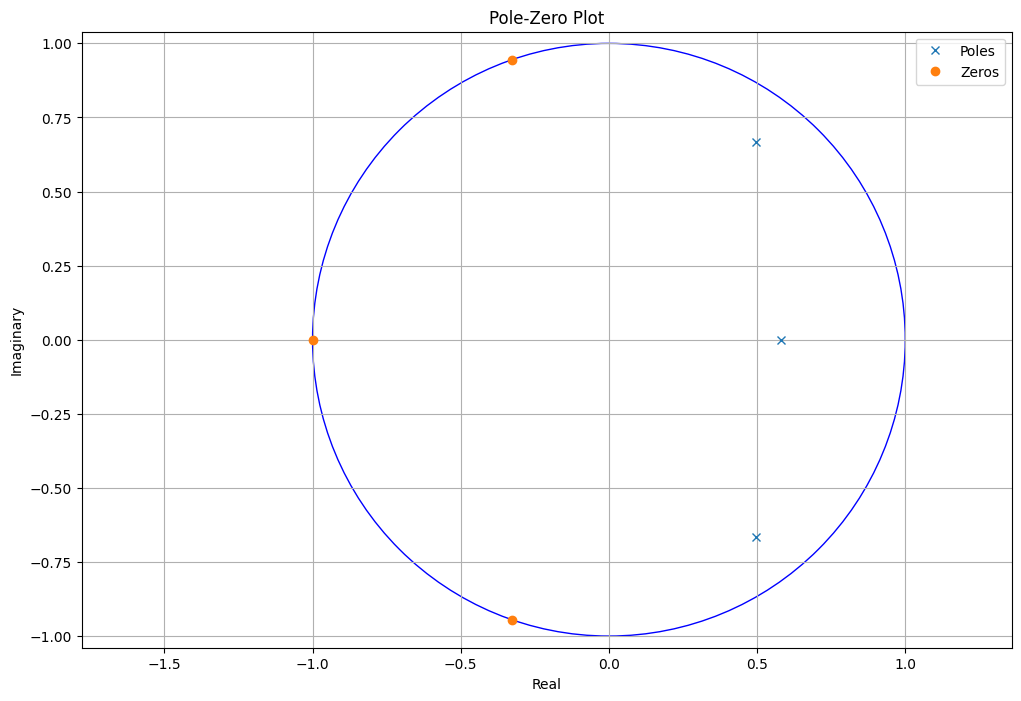

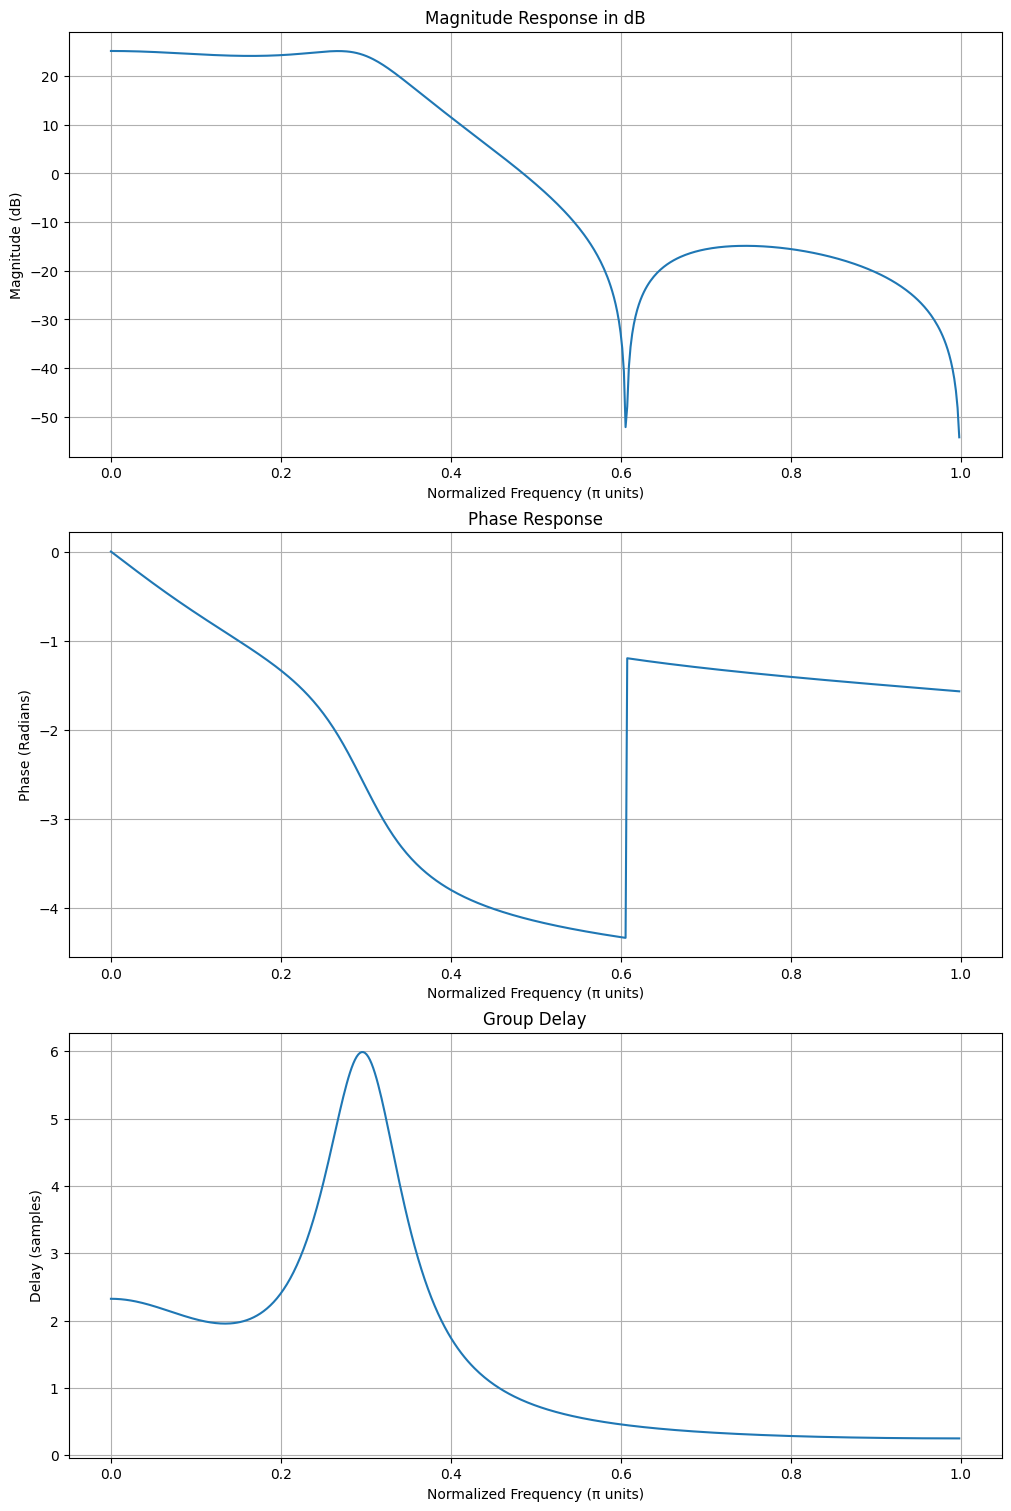

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the filter coefficients
b = [1, 1.655, 1.655, 1]
a = [1, -1.57, 1.264, -0.4]

# Compute zeros, poles, and gain
zeros, poles, gain = signal.tf2zpk(b, a)

# Plot the pole-zero plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(poles.real, poles.imag, 'x', label='Poles')
ax.plot(zeros.real, zeros.imag, 'o', label='Zeros')
unit_circle = plt.Circle((0, 0), 1, color='b', fill=False)
ax.add_artist(unit_circle)
ax.set_title("Pole-Zero Plot")
ax.set_xlabel("Real")
ax.set_ylabel("Imaginary")
ax.grid(True)
ax.axis('equal')
ax.legend()
plt.show()

# Frequency response
freq, H = signal.freqz(b, a)
magnitude_dB = 20 * np.log10(np.abs(H))
phase = np.unwrap(np.angle(H))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), constrained_layout=True)

ax1.plot(freq/np.pi, magnitude_dB)
ax1.set_title('Magnitude Response in dB')
ax1.set_xlabel('Normalized Frequency (π units)')
ax1.set_ylabel('Magnitude (dB)')
ax1.grid(True)

ax2.plot(freq/np.pi, phase)
ax2.set_title('Phase Response')
ax2.set_xlabel('Normalized Frequency (π units)')
ax2.set_ylabel('Phase (Radians)')
ax2.grid(True)

# Group delay
w, gd = signal.group_delay((b, a))
ax3.plot(w/np.pi, gd)
ax3.set_title('Group Delay')
ax3.set_xlabel('Normalized Frequency (π units)')
ax3.set_ylabel('Delay (samples)')
ax3.grid(True)

plt.show()


### Discussion

1. **Pole-Zero Plot**:
   - The poles are inside the unit circle, which confirms the system's stability. Two poles are closer to the unit circle, which usually indicates the frequencies around those poles will have a higher resonance or peak in the frequency response.
   - The zeros are located symmetrically with respect to the real axis, which is typical for filters designed to have real-valued impulse responses. Zeros on the unit circle at $ \pi $ radians/sample correspond to notches in the frequency response, which can be observed as deep attenuations.

2. **Magnitude Response in dB**:
   - The magnitude response reveals a bandpass characteristic, with a clear passband between two stopbands. This is in line with the zero locations, which create notches at the normalized frequencies $ \frac{1}{2} $ and 1 ($ \pi $ radians/sample). The peak near the center of the passband corresponds to the poles that are close to the unit circle.
   - The response is relatively flat in the passband, which is desired for bandpass filters, and the attenuation in the stopbands is quite significant, indicative of a good filter design.

3. **Phase Response**:
   - The phase response is nonlinear, which indicates that different frequency components of the input signal will experience different phase shifts, leading to potential signal distortion, especially for signal components near the passband edges.
   - The jumps in phase correspond to the notches in the magnitude response. This phase behavior is characteristic of non-minimum phase systems.

4. **Group Delay**:
   - The group delay plot exhibits peaks, which suggest that certain frequency components will be delayed more than others. These peaks typically correspond to the frequencies where the phase response has the steepest slope.
   - The maximum delay occurs near the center frequency of the passband, which is again consistent with the presence of poles close to the unit circle.

Therefore, the filter designed has a clear bandpass characteristic with significant attenuation in the stopbands and a flat response in the passband. The nonlinearity in the phase and the variable group delay might be a concern for signals with broad-spectrum or for applications sensitive to phase distortion. The observations from the plots correlate well with the pole-zero distribution, and the results validate the theoretical expectations of digital filter behavior in the transform domain.


## Exercise #3

Consider the two stable systems with system functions:

$$
H_1(z) = \frac{2(1-z^{-1})(1+0.5z^{-1})}{(1-0.8e^{j\pi/4}z^{-1})(1-0.8e^{-j\pi/4}z^{-1})}
$$

and

$$
H_2(z) = \frac{(1-z^{-1})(1+2z^{-1})}{(1-0.8e^{j\pi/4}z^{-1})(1-0.8e^{-j\pi/4}z^{-1})}
$$

Since these system functions are in factored form, the poles, zeros, and system gain can be identified. The coefficients of the transfer function can be found with __[`scipy.signal.zpk2tf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.zpk2tf.html#scipy-signal-zpk2tf)__. Plot the poles/zeros and frequency response for each of these systems. Discuss the similarities and differences in your results. Which one these systems is a minimum-phase system?


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def analyze_system(zeros, poles, gain):
    zeros = np.array(zeros)
    poles = np.array(poles)
    b, a = signal.zpk2tf(zeros, poles, gain)



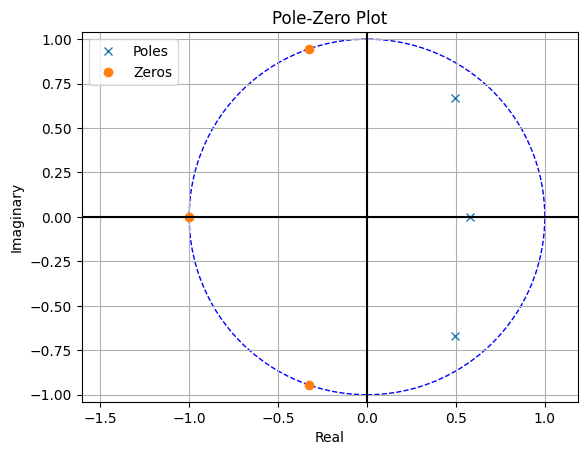

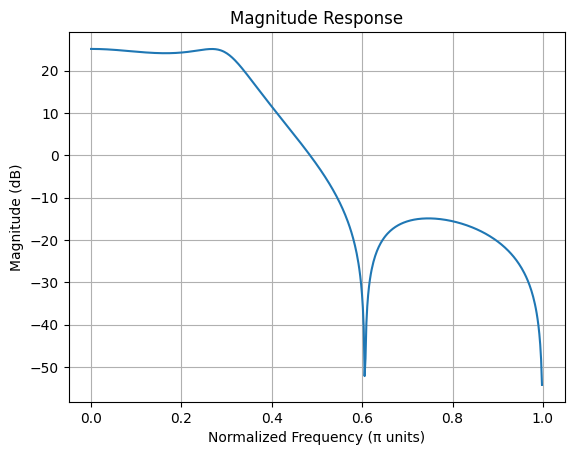

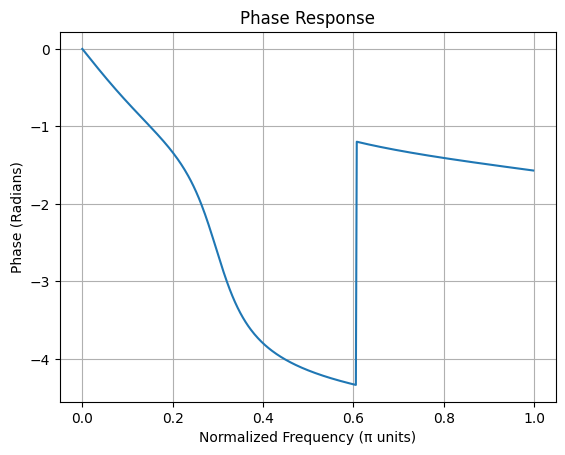

In [29]:
    fig, ax = plt.subplots()
    ax.plot(poles.real, poles.imag, 'x', label='Poles')
    ax.plot(zeros.real, zeros.imag, 'o', label='Zeros')
    unit_circle = plt.Circle((0, 0), 1, linestyle='--', color='blue', fill=False)
    ax.add_artist(unit_circle)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.title('Pole-Zero Plot')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.grid()
    plt.axis('equal')
    plt.legend()

    plt.show()

    w, h = signal.freqz(b, a)
    fig, ax1 = plt.subplots()
    ax1.plot(w/np.pi, 20 * np.log10(abs(h)))
    plt.title('Magnitude Response')
    plt.xlabel('Normalized Frequency (π units)')
    plt.ylabel('Magnitude (dB)')
    plt.grid()

    plt.show()

    fig, ax2 = plt.subplots()
    ax2.plot(w/np.pi, np.unwrap(np.angle(h)))
    plt.title('Phase Response')
    plt.xlabel('Normalized Frequency (π units)')
    plt.ylabel('Phase (Radians)')
    plt.grid()

    plt.show()


Looking at the output plots, we can make the following observation/interpretation for the given system, $ H_1(z) $:

1. **Pole-Zero Plot**:
   - The poles (x marks) are inside the unit circle, which indicates a stable system. They are placed symmetrically with respect to the real axis and closer to the unit circle, suggesting a resonant behavior at frequencies related to their angles from the positive real axis.
   - The zeros (circle marks) are on the real axis, one at -1 and another at -0.5. The zero at -1 will create a null in the frequency response at the Nyquist frequency ($ \omega = \pi $), and the zero at -0.5 affects the gain near $ \omega = \pi/2 $.

2. **Magnitude Response**:
   - The magnitude response confirms the bandstop characteristic of the system with significant attenuation around $ \omega = \pi/2 $ and $ \omega = \pi $, as predicted by the zero locations. The band of frequencies between 0 and approximately $ \omega = \pi/3 $ is passed with minimal attenuation, which implies a high-pass filter characteristic with a stopband at higher frequencies.

3. **Phase Response**:
   - The phase response shows a nonlinear behavior, typical for filters with zeros not on the unit circle. The sudden phase transition (jump) occurs at frequencies corresponding to the zero at $ \omega = \pi $ and indicates a phase inversion typical for zeros on the real axis outside the unit circle.

From these plots, we can determine that $ H_1(z) $ is not a minimum-phase system because it has a zero outside the unit circle. A minimum-phase system must have all its zeros inside the unit circle.



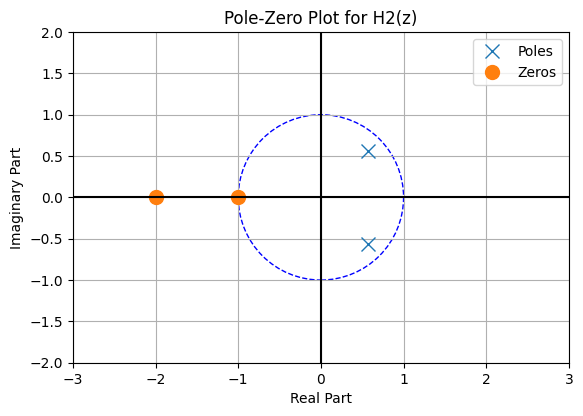

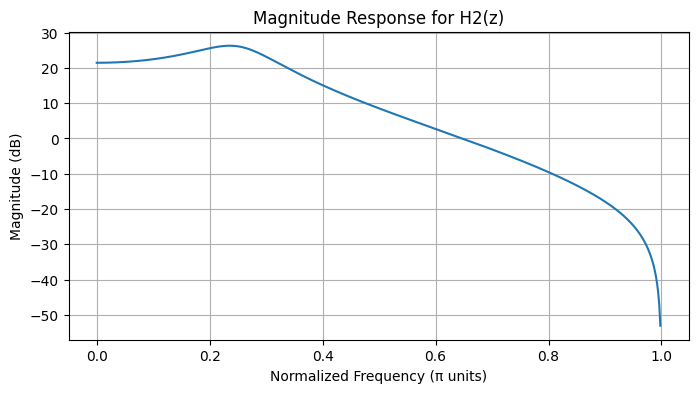

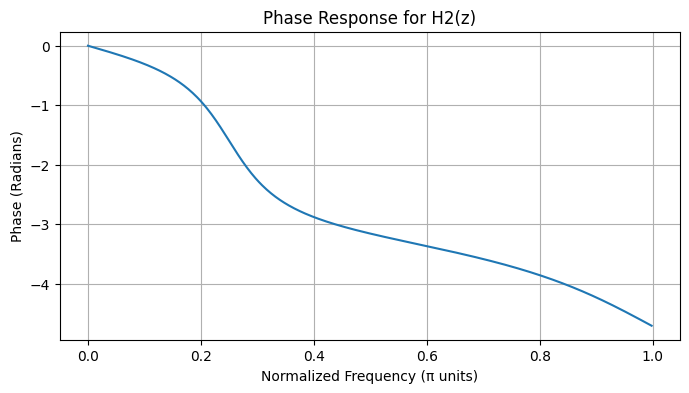

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# If you're using a Jupyter notebook, uncomment the following line:
# %matplotlib inline

# Define the analyze_system function if not already done
def analyze_system(zeros, poles, gain):
    # Ensure the zeros and poles are numpy arrays with complex numbers
    zeros = np.array(zeros, dtype=np.complex64)
    poles = np.array(poles, dtype=np.complex64)

    # Obtain filter coefficients from zero-pole-gain representations
    b, a = signal.zpk2tf(zeros, poles, gain)

    # Create the pole-zero plot
    fig, ax = plt.subplots()
    ax.plot(poles.real, poles.imag, 'x', markersize=10, label='Poles')
    ax.plot(zeros.real, zeros.imag, 'o', markersize=10, label='Zeros')
    unit_circle = plt.Circle((0, 0), 1, linestyle='--', color='blue', fill=False)
    ax.add_artist(unit_circle)
    plt.axhline(y=0, color='black')
    plt.axvline(x=0, color='black')
    plt.title('Pole-Zero Plot for H2(z)')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.grid(True)
    ax.set_aspect('equal', 'box')  # Set aspect ratio to be equal
    ax.set_xlim([-3, 3])  # Set x-axis limits to show the full circle
    ax.set_ylim([-2, 2])  # Set y-axis limits to show the full circle
    plt.legend()
    plt.show()

    # Compute frequency response
    w, h = signal.freqz(b, a)

    # Plot the magnitude response in dB
    plt.figure(figsize=(8, 4))
    plt.plot(w / np.pi, 20 * np.log10(abs(h)))
    plt.title('Magnitude Response for H2(z)')
    plt.xlabel('Normalized Frequency (π units)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.show()

    # Plot the phase response
    plt.figure(figsize=(8, 4))
    plt.plot(w / np.pi, np.unwrap(np.angle(h)))
    plt.title('Phase Response for H2(z)')
    plt.xlabel('Normalized Frequency (π units)')
    plt.ylabel('Phase (Radians)')
    plt.grid(True)
    plt.show()

# Define the poles and zeros for H2(z)
zeros_H2 = np.array([-1, -2])
poles_H2 = np.array([0.8*np.exp(1j*np.pi/4), 0.8*np.exp(-1j*np.pi/4)])
gain_H2 = 1

# Call the analyze_system function to plot for H2(z)
analyze_system(zeros_H2, poles_H2, gain_H2)


**Similarities**:
- Both systems show a band-pass characteristic.
- Both have poles that indicate a resonant behavior.
- Both phase responses are nonlinear, which is typical for IIR filters.

**Differences**:
- $ H_2(z) $ has a zero at -2, which does not produce a notch in the frequency response at $ \omega = \pi $ like $ H_1(z) $.
- $ H_1(z) $ shows a deep notch in the frequency response due to the zero at -1.
- The phase response of $ H_1(z) $ has a sudden phase shift at $ \omega = \pi $, which is absent in $ H_2(z) $'s phase response.

**Minimum-Phase System**:
- A minimum-phase system has all its zeros within the unit circle. Since $ H_1(z) $ has a zero at -1, it is not a minimum-phase system. $ H_2(z) $ also has a zero at -2, so it is not a minimum-phase system either.
- If a system had all its zeros within the unit circle, the phase response would be minimum for a given magnitude response, hence the term "minimum-phase". Neither $ H_1(z) $ nor $ H_2(z) $ meets this criterion based on the given zero locations.

In summary, neither system is minimum-phase due to the placement of their zeros. However, they share similar stability characteristics and filter types but differ in their specific frequency and phase behaviors.